## **EDA Análisis exploratorio de los datos: Regresión Lineal** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [4]:
df.head(5)

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## **Limpieza y preparación de datos**

#### **Data Leakage**
Se identifican variables no relevantes relacionadas con información de las haciendas. 

In [5]:
DATA_LEAKAGE = ['Hacienda', 'Nombre', 'Zona', 'Codigo Estacion']
df = df.drop(columns = DATA_LEAKAGE)

#### **Datos Nulos**
Se extraen porcentajes de nulos para identificar features a eliminar, a imputar y si existen similitudes entre las mismas. 

In [6]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Sum Oscilacion Temp Ciclo    100.000000
Fert.Nitrogen.               100.000000
Urea 46%                      96.561564
NITRAX-S                      96.442669
MEZ                           95.382128
MicroZinc                     94.535597
Boro Granul.                  93.888810
Sul.Amonio                    93.546393
NITO_XTEND                    82.503448
Vinaza                        80.510772
Temp. Media Ciclo             78.456271
Temp. Media 0-3               78.456271
Humedad Rel Media Ciclo       78.456271
Humedad Rel Media 0-3         78.456271
Temp Min Ciclo                78.456271
Temp Max Ciclo                78.456271
Evaporacion Ciclo             78.456271
Radiacion Solar Ciclo         78.456271
Evaporacion 0-3               78.456271
Precipitacion Ciclo           78.456271
Precipitacion 0_3             78.456271
Oscilacion Temp Ciclo         78.456271
Radicion Solar 0-3            78.456271
Oscilacion Temp Med 0-3       78.456271
%Infest.Diatrea               73.367575


#### **Columnas Vacías**

Eliminamos columnas vacías del Df


In [7]:
COLUMNS_TO_DROP = ['Sum Oscilacion Temp Ciclo', 'Fert.Nitrogen.']
df = df.drop(columns = COLUMNS_TO_DROP)

#### **Chem Features**

Se observan columnas con porcentajes de nulos demasiado altos [99% - 80%]. Parecen columnas relacionadas a productos o químicos que se utilizaron en la plantación, su ausencia podría indicar que el producto no se usó. Se imputarán con 0's. 


In [8]:
CHEM_FEATURES = ['Urea 46%', 'NITRAX-S', 'MEZ', 'NITO_XTEND', 'Vinaza', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio']
df[CHEM_FEATURES] = df[CHEM_FEATURES].fillna(0)

#### **Weather Features**
Se observa un porcentaje en comun con variables relacionadas con condiciones climáticas (78.456271%) por esa razón, se procede a agruparlas en la categoría de weather features

In [29]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media 0-3', 'Oscilacion Temp Med 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Evaporacion 0-3', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo', 'Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Precipitacion 0_3']
TARGET = ['TCH', '%Sac.Caña']

In [30]:
df_filtered_weather = df.dropna(subset=WEATHER_FEATURES, how="any")
df_filtered_weather.head(3)

,Período,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,Cod.Estado #,Cod.Estado,F.Siembra,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo,Período_Mes
13972,2,11.0,012,PALMIRA,15.61,2.2,CC05-430,2,Corte 2,2017-11-09,...,81.756,14.8,22.763,419.966,422.141,510.8,1523.1,420.8,1744.2,2
13973,2,11.0,019C,PALMIRA,6.46,2.2,CC09-535,0,Plantilla,2021-02-22,...,81.756,14.8,22.763,419.966,422.141,510.8,1523.1,420.8,1744.2,2
13974,2,11.0,050A,ESMERALDA,13.15,1.8,CC05-430,2,Corte 2,2019-04-25,...,81.713,14.8,22.763,423.232,423.395,468.1,1422.3,421.7,1716.2,2


In [31]:
df_filtered_weather.tail(3)

,Período,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,Cod.Estado #,Cod.Estado,F.Siembra,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo,Período_Mes
21024,7,11.0,054E,LA PAZ,1.85,1.8,CC05-430,3,Corte 3,2020-09-15,...,78.704,17.8,30.945,461.663,444.528,168.7,1041.6,536.4,1867.2,7
21025,7,11.0,165,PALMIRA,31.42,3.5,CC05-430,3,Corte 3,2020-03-30,...,78.720,17.8,31.040,467.911,444.839,177.3,1037.8,544.2,1843.9,7
21026,7,11.0,001,CORINTIAS,2.22,1.1,CC05-430,4,Corte 4,2019-06-05,...,78.687,17.8,30.890,459.274,444.372,119.8,1041.6,532.5,1881.2,7


In [32]:
df_filtered_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4530 entries, 13972 to 21026
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Período                  4530 non-null   int64         
 1   Tenencia                 4530 non-null   float64       
 2   Suerte                   4530 non-null   object        
 3   Suelo                    4328 non-null   object        
 4   Area Neta                4530 non-null   float64       
 5   Dist Km                  4530 non-null   float64       
 6   Variedad                 4530 non-null   object        
 7   Cod.Estado #             4530 non-null   int64         
 8   Cod.Estado               4530 non-null   object        
 9   F.Siembra                4530 non-null   datetime64[ns]
 10  D.S.                     2062 non-null   object        
 11  Ult.Riego                1942 non-null   datetime64[ns]
 12  Edad Ult Cos             4530 non-

Además, se observa que `WEATHER_FEATURES` tienen el mismo porcentaje de nulos debido a que solo se tiene estos registros de los periodos 202202 hasta 202407 (4530 registros de los 24027 registros que se tenían). 

Se tienen dos opciones, trabajar cone el dataset original y filtrar los features del clima, para trabajar así solo con otras variables, por otra parte, se puede analizar el subset de 4530 junto las variables del clima

In [33]:
nulls = df_filtered_weather.isnull().sum()
nulls = nulls[nulls > 0].sort_values(ascending=False)

print("Columnas con nulos después de filtrar climáticos:\n")
print(nulls)

Columnas con nulos después de filtrar climáticos:

Edad.Precosecha        4517
%Infest.Diatrea        2952
Num.Riegos             2589
Ult.Riego              2588
D.S.                   2468
Semanas mad.           2305
Fec.Madur.             2305
Producto               2305
%AR Jugo                382
%Fibra Caña             310
%ME Veg                 310
%ME Min                 310
Fosfato Jugo            310
%ME Tot                 310
%Sac.Muestreadora       310
Vejez                   234
Suelo                   202
%ATR                    172
KATRHM                  172
%Sac.Caña               157
Pureza                   86
Rdto                     86
Brix                     86
Ton.Azucar               77
TAH                      77
TAHM                     77
Dosis Madurante           8
Sac.Caña Precosecha       5
dtype: int64


In [36]:
numeric_df = df_filtered_weather.select_dtypes(include=['float64', 'int64'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4530 entries, 13972 to 21026
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Período                  4530 non-null   int64  
 1   Tenencia                 4530 non-null   float64
 2   Area Neta                4530 non-null   float64
 3   Dist Km                  4530 non-null   float64
 4   Cod.Estado #             4530 non-null   int64  
 5   Edad Ult Cos             4530 non-null   float64
 6   Destino 1=Semilla        4530 non-null   int64  
 7   Cod. T.Cultivo           4530 non-null   float64
 8   Dosis Madurante          4522 non-null   float64
 9   Semanas mad.             2225 non-null   float64
 10  TonUltCorte              4530 non-null   float64
 11  TCH                      4530 non-null   float64
 12  TCHM                     4530 non-null   float64
 13  Ton.Azucar               4453 non-null   float64
 14  Rdto                    

In [37]:
numeric_df['Período_Mes'] = numeric_df['Período'].astype(str).str[-2:].astype(int)

In [38]:
numeric_df = numeric_df.drop(columns =['Período'])

In [39]:
numeric_df['Período_Mes'].value_counts()

Período_Mes
3     533
6     468
4     458
8     435
7     422
2     380
5     368
9     351
1     317
12    307
10    284
11    207
Name: count, dtype: int64

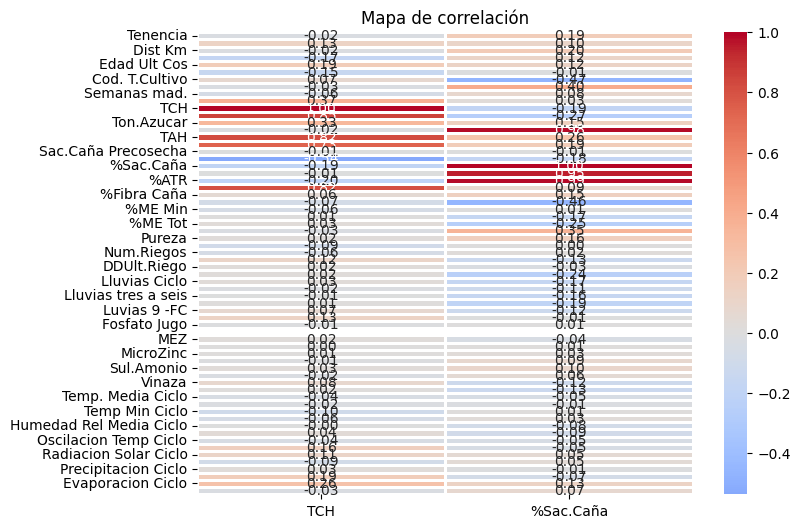

In [ ]:
corr = numeric_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr[TARGET], 
            annot=True,      # Muestra los valores de correlación
            cmap="coolwarm", # Colormap
            center=0,        # Centro del mapa en 0
            fmt=".2f",       # Formato de números
            linewidths=0.5)  # Líneas entre celdas

plt.title("Mapa de correlación")
plt.show()